# Projectile Game

Learn quadratic functions by building a projectile game. Starting at (0,0) you launch a toy rocket that must clear a wall. You can randomize the height and location of the wall. The goal is to determine what initial velocity would get the rocket over the wall. Bonus: make an animation of the path of the rocket.


Assuming gravity = -9.8 m/s²
Initial velocity should be 356.8352941176471 m/s


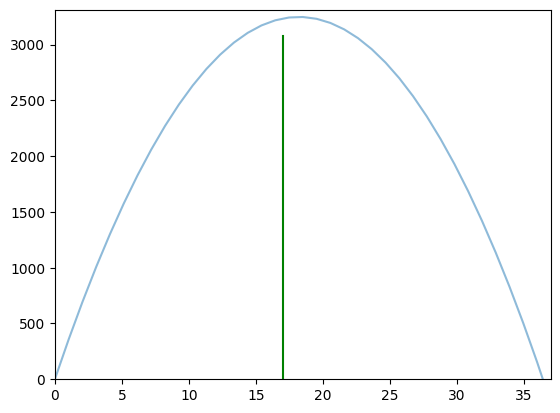

In [2]:
# Write your code here
import numpy as np
import matplotlib.pyplot as plt
import math
import time
from IPython import display

height = np.random.randint(1000, 5000)
location = np.random.randint(10, 25)
x1 = location
y1 = height * 1.05
a = -9.8
b = - a * location + y1 / x1
vx = -b/(2 * a)
vy = a * vx ** 2 + b * vx
xmin = 0
xmax = int(math.ceil(2 * vx))
ymin = 0
ymax = int(vy * 1.02)
points_amount = xmax - xmin

for i in range(points_amount):
    current_x = xmin + i + 1
    x = np.linspace(xmin, current_x, current_x - xmin)
    y = a * x**2 + b * x

    plt.clf()
    plt.axis([xmin, xmax, ymin, ymax])
    plt.plot(x, y, alpha = 0.5)
    plt.plot([location, location], [0, height], 'green')
    plt.plot([current_x], [a * current_x ** 2 + b * current_x], 'k^')

    display.display(plt.gcf())
    time.sleep(0.1)
    display.clear_output(wait=True)

print("Assuming gravity = " + str(a) + " m/s²")
print("Initial velocity should be " + str(b) + " m/s")
plt.show()
# This step does not have a test

# Define Graphing Functions

Building on what you have already done, create a menu with the following options:<br>
<ul>
<li>Display the graph and a table of values for any "y=" equation input</li>
<li>Solve a system of two equations without graphing</li>
<li>Graph two equations and plot the point of intersection</li>
<li>Given a, b and c in a quadratic equation, plot the roots and vertex</li>
</ul>
Then think about how you will define a function for each item.

In [2]:
# Write your code here

def display_menu():
    print("Choose an option below:")
    print("1. Display the graph and a table of values for any \"y=\" equation input")
    print("2. Solve a system of two equations without graphing")
    print("3. Graph two equations and plot the point of intersection")
    print("4. Given a, b and c in a quadratic equation, plot the roots and vertex")
    return input("")

display_menu()
# This step does not have a test

Choose an option below:
1. Display the graph and a table of values for any "y=" equation input
2. Solve a system of two equations without graphing
3. Graph two equations and plot the point of intersection
4. Given a, b and c in a quadratic equation, plot the roots and vertex


'2'

In [27]:
# Write your code here
from sympy import solve, nonlinsolve, Symbol, plotting, lambdify, Eq
from sympy.parsing.sympy_parser import parse_expr
import matplotlib.pyplot as plt
import numpy as np
import math

def graph_and_table_y_equals(equation_input):
    xmax = 20
    solutions_x = range(0, xmax + 1)
    solutions_y = np.empty((xmax + 1))

    for value in solutions_x:
        equation = parse_expr(equation_input + "-y")
        new_eq = equation.subs("x", value)
        solutions_y[value] = solve(new_eq)[0]
    
    print("x \t y")
    for i, value in enumerate(solutions_x):
        print(solutions_x[i], "\t", solutions_y[i])

    plt.axis([0, xmax, np.min(solutions_y), np.max(solutions_y)])
    plt.plot(solutions_x, solutions_y, 'orange')
    plt.show()


def solve_system(equation_input_arr):
    x, y = Symbol('x'), Symbol('y')
    equations = (parse_expr(equation_input_arr[0]), parse_expr(equation_input_arr[1]))
    solutions = nonlinsolve(equations, (x, y))
    return solutions

def graph_equations(equation_input_arr):
    x, y = Symbol('x'), Symbol('y')
    equations = (parse_expr(equation_input_arr[0]), parse_expr(equation_input_arr[1]))
    intersection = Eq(equations[0], equations[1])
    intersection_x = solve(intersection)
    intersection_y = [equations[0].subs(x, intersection_x[0])]
    xx = np.linspace(-50, 50, 100)
    yy = lambdify(x, equations)(xx)

    plt.plot([0, 0], [np.min(yy), np.max(yy)], 'k', alpha=0.5)
    plt.plot([np.min(xx), np.max(xx)], [0, 0], 'k', alpha=0.5)
    plt.plot(xx, np.transpose(yy))
    plt.plot(intersection_x, intersection_y, 'ro')
    plt.show()

def graph_quadratic(a, b, c):
    vx = -b/(2 * a)
    vy = a * vx**2 + b * vx + c
    dt = b**2 - 4 * a * c
    roots = []
    points = 30
    xmin = int(vx - points / 2)
    xmax = int(vx + points / 2)
    solutions_x = range(xmin, xmax + 1)
    solutions_y = np.empty((len(solutions_x)))

    for i, x in enumerate(solutions_x):
        solutions_y[i] = a * x**2 + b * x + c

    ymin = np.min(solutions_y)
    ymax = np.max(solutions_y)
    ydiff = ymax-ymin
    ymin -= ydiff * 0.05
    ymax += ydiff * 0.05

    if dt >= 0:
        roots = [
            (-b + math.sqrt(dt)) / (2 * a), 
            (-b - math.sqrt(dt)) / (2 * a)
        ]

    for root in roots:
        plt.plot([root], [0], 'go')


    print("Vertex = ({}, {})".format(vx, vy))
    print("Roots =", roots)

    plt.axis([xmin, xmax, ymin, ymax])
    plt.plot([0, 0], [ymin, ymax], 'k', alpha=0.5)
    plt.plot([xmin, xmax], [0, 0], 'k', alpha=0.5)
    plt.plot(solutions_x, solutions_y, 'orange')
    plt.plot([vx], [vy], 'bo')
    plt.show()

# This step does not have a test

# Certification Project 2

Build a graphing calculator that performs the functions mentioned in the previous step:
<ul>
<li>Display the graph and a table of values for any "y=" equation input</li>
<li>Solve a system of two equations without graphing</li>
<li>Graph two equations and plot the point of intersection</li>
<li>Given a, b and c in a quadratic equation, plot the roots and vertex</li>
</ul>
Define each of the functions, and make each option call a function.

Choose an option below:
1. Display the graph and a table of values for any "y=" equation input
2. Solve a system of two equations without graphing
3. Graph two equations and plot the point of intersection
4. Given a, b and c in a quadratic equation, plot the roots and vertex
Graphing a quadratic equation.
a = 3.0 and b = -2.0 and c= 0.0
Vertex = (0.3333333333333333, -0.3333333333333333)
Roots =  [0.6666666666666666, 0.0]


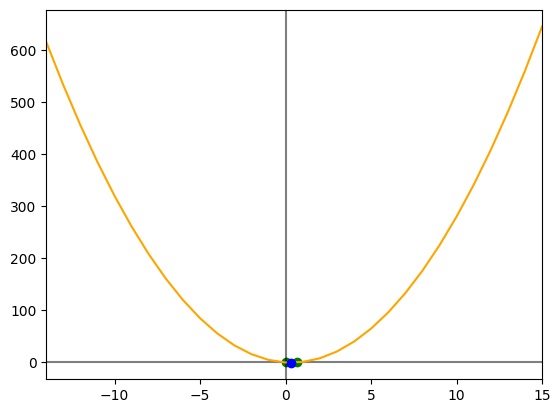

In [29]:
option = int(display_menu())

if option == 1:
    print("Displaying the graph and table for \"y=\".")
    equation_input = input("Enter your equation: y = ")
    print("y =", equation_input)
    graph_and_table_y_equals(equation_input)
elif option == 2:
    print("Solving a system of two equations.")
    equations_input_arr = (input("Enter your first equation: 0 = "), input("Enter your second equation: 0 = "))
    print("Equation 1: 0 =", equations_input_arr[0])
    print("Equation 2: 0 =", equations_input_arr[1])
    print("Solutions set:", solve_system(equations_input_arr))
elif option == 3:
    print("Graphing two equations.")
    equations_input_arr = (input("Enter your first equation: y = "), input("Enter your second equation: y = "))
    print("Equation 1: y =", equations_input_arr[0])
    print("Equation 2: y =", equations_input_arr[1])
    graph_equations(equations_input_arr)
elif option == 4:
    print("Graphing a quadratic equation.")
    a = float(input("Enter the value for a: "))
    if a == 0:
        print("Value for a can't be zero.")
    else:
        b = float(input("Enter the value for b: "))
        c = float(input("Enter the value for c: "))
        print("a =", a, "and b =", b, "and c=", c)
        graph_quadratic(a, b, c)